[markdown]
# Pandas - Panel data

In [2]:
import pandas as pd


In [3]:
my_expenses = [50, 30, 65, 150, 200, 20] # 6 days expenses as a list

In [4]:
my_expenses[4]

200

In [5]:
my_expenses_series = pd.Series(my_expenses)
my_expenses_series

0     50
1     30
2     65
3    150
4    200
5     20
dtype: int64

In [6]:
my_expenses_series.index = [f'day{i}' for i in range(len(my_expenses))]
my_expenses_series

day0     50
day1     30
day2     65
day3    150
day4    200
day5     20
dtype: int64

In [7]:
my_expenses_series['day4'] # retrieve by index label

200

In [8]:
my_expenses_series['day2': 'day4'] # retrieve by label of the index slicing

day2     65
day3    150
day4    200
dtype: int64

In [9]:
my_expenses_series[['day2', 'day5']] # retrieval using a list of an index label

day2    65
day5    20
dtype: int64

In [10]:
my_expenses_series[[2, 3]] # retrieval using a list of index numbers

day2     65
day3    150
dtype: int64

In [11]:
my_expenses_series[my_expenses_series > 100] # retrieve by condition
# scalar filtering

day3    150
day4    200
dtype: int64

In [12]:
# operators used inside pandas series  
# bitwise operator in actuall python
# & -> and 
# | -> or



In [13]:
my_expenses_series[ (my_expenses_series > 50) & (my_expenses_series < 100) ]

day2    65
dtype: int64

In [14]:
# too low or high
my_expenses_series[ (my_expenses_series < 30) | (my_expenses_series > 150) ]

day4    200
day5     20
dtype: int64

[markdown]

Dataframe - Collection of Series

In [15]:
data = pd.read_csv('data/mtcars.csv')

[markdown]
Research about the data completely
Client may not be using all the variables

We treat different data types separately

Quatitative(Continuous, discrete) Qualitative(Ordinal, nominal)



In [16]:
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


In [17]:
data.tail()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2
28,Ford Pantera L,15.8,8,351.0,264,4.22,3.170,14.5,0,1,5,4
29,Ferrari Dino,19.7,6,145.0,175,3.62,2.770,15.5,0,1,5,6
30,Maserati Bora,15.0,8,301.0,335,3.54,3.570,14.6,0,1,5,8
31,Volvo 142E,21.4,4,121.0,109,4.11,2.780,18.6,1,1,4,2


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 12 columns):
car_model    32 non-null object
mpg          32 non-null float64
cyl          32 non-null int64
disp         32 non-null float64
hp           32 non-null int64
drat         32 non-null float64
wt           32 non-null float64
qsec         32 non-null float64
vs           32 non-null int64
am           32 non-null int64
gear         32 non-null int64
carb         32 non-null int64
dtypes: float64(5), int64(6), object(1)
memory usage: 3.1+ KB


[markdown]

all data in data warehouse will be in rows and column format panel data format

You can have missing values or blank values


In [21]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.0000
mean,20.090625,6.187500,230.721875,146.687500,3.596563,3.217250,17.848750,0.437500,0.406250,3.687500,2.8125
std,6.026948,1.785922,123.938694,68.562868,0.534679,0.978457,1.786943,0.504016,0.498991,0.737804,1.6152
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.0000
25%,15.425000,4.000000,120.825000,96.500000,3.080000,2.581250,16.892500,0.000000,0.000000,3.000000,2.0000
50%,19.200000,6.000000,196.300000,123.000000,3.695000,3.325000,17.710000,0.000000,0.000000,4.000000,2.0000
75%,22.800000,8.000000,326.000000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.0000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,22.900000,1.000000,1.000000,5.000000,8.0000



25 % mark Q1
50 % mark Q2 also called median
75 % mark Q3

IQR inter quartile range = Q3 - Q1

since we have 32 cars

8 cars have mileage below Q1 (15.42) in mpg

8 cars have mileage above Q4 (22.8) in mpg
read further because what happens if equal to value
what happens when multiple data points with same value

In [22]:
len(data)

32

In [23]:
data[data['mpg'] < 15.425].shape

(8, 12)

In [24]:
data[data['mpg'] > 22.8].shape

(7, 12)

In [25]:
data[data['mpg'] == 22.8].shape

(2, 12)

In [26]:
data.head(3)

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [27]:
data.loc[2,'hp'] # by label 

93

In [28]:
data.iloc[1, 4] # index location

110

In [29]:
data.loc[2:5, 'car_model': 'hp']

,car_model,mpg,cyl,disp,hp
2,Datsun 710,22.8,4,108.0,93
3,Hornet 4 Drive,21.4,6,258.0,110
4,Hornet Sportabout,18.7,8,360.0,175
5,Valiant,18.1,6,225.0,105


In [30]:
data.iloc[2:5, 0:5]

,car_model,mpg,cyl,disp,hp
2,Datsun 710,22.8,4,108.0,93
3,Hornet 4 Drive,21.4,6,258.0,110
4,Hornet Sportabout,18.7,8,360.0,175


In [31]:
# retrieve by list

data.loc[2:5, ['car_model', 'wt', 'hp', 'mpg']]

,car_model,wt,hp,mpg
2,Datsun 710,2.320,93,22.8
3,Hornet 4 Drive,3.215,110,21.4
4,Hornet Sportabout,3.440,175,18.7
5,Valiant,3.460,105,18.1


In [32]:
data.loc[2:5, :]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1


In [33]:
data.iloc[2:5, 3:5]

,disp,hp
2,108.0,93
3,258.0,110
4,360.0,175


In [34]:
# retrieve by condition
data.loc[data.mpg>25, ]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
17,Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
18,Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
25,Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
26,Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.90,1,1,5,2


In [35]:
# find the cars that are economical and powerful

data.loc[(data.mpg > 30) & (data.hp > 110) ]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
27,Lotus Europa,30.4,4,95.1,113,3.77,1.513,16.9,1,1,5,2


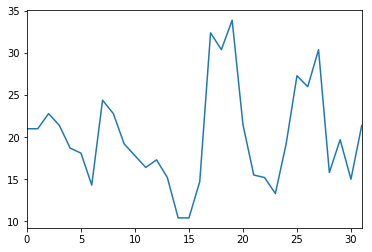

In [37]:
data.mpg.plot()

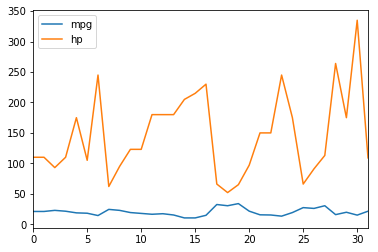

In [39]:
data.loc[:, ['mpg', 'hp']].plot()